In [1]:
import numpy as np
import random
from scipy.interpolate import griddata
from scipy.stats import multivariate_normal
import numpy.ma as ma
from numpy.random import uniform, seed
from matplotlib import cm
from scipy.special import softmax
import matplotlib.pyplot as plt
%matplotlib inline

# ２クラス分類

In [2]:
def plot_data_line(w,x):
    plt.scatter(x[0][:,0],x[0][:,1],c='green')
    plt.scatter(x[1][:,0],x[1][:,1],c='red')
    x_lim = [int(min(min(x[0][:,0]),min(x[1][:,0])))-2,int(max(max(x[0][:,0]),max(x[1][:,0])))+2]
    y_lim = [int(min(min(x[0][:,1]),min(x[1][:,1])))-2,int(max(max(x[0][:,1]),max(x[1][:,1])))+2]
    xx = np.linspace(x_lim[0],x_lim[1],100)
    yy = -w[0]/w[1]*xx-w[2]/w[1]
    plt.xlim(x_lim)
    plt.ylim(y_lim)
    plt.plot(xx,yy)

#### 訓練データの生成と学習

Initial State


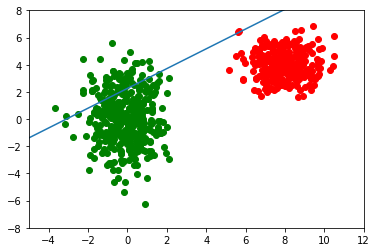

Converged at iteration #41


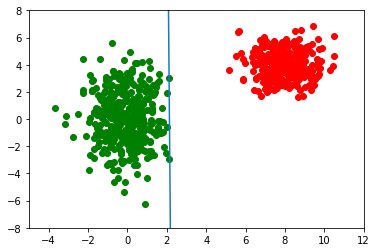

In [3]:
n_i = [400,300]
n = sum(n_i)
x = []
x.append(np.dot(np.random.randn(n_i[0],2),np.sqrt(np.diag([1,4]))))
x.append(np.random.randn(n_i[1],2)+np.dot(np.asarray([[1.]*n_i[1]]).T,np.asarray([[8.0,4.0]])))


for i in range(len(n_i)):
    x_tmp = np.ones((n_i[i],1))
    x[i] = np.append(x[i],x_tmp,axis=1)

lr = 0.1
label = [1,-1]
w = np.random.randn(3)

print("Initial State")
plot_data_line(w,x)
plt.show()

iteration = 0
while True:
    n_mis = 0
    for i in range(len(x)):
        x_i = x[i]
        g = np.dot(x_i,w)
        g[g>0] = 1
        g[g<0] = -1
        for j in range(len(g)):
            if g[j]!=label[i]:
                n_mis += 1
                w = w + label[i]*lr*x[i][j]  
    iteration += 1
    #if(iteration%30==0):
        #print("iteration #%d"%(iteration))
        #plot_data_line(w,x)
        #plt.show()
    if n_mis==0:
        break

print("Converged at iteration #%d"%(iteration))
plot_data_line(w,x)
plt.show()

#### テストデータの生成と評価

Errors:  [2, 0, 0]


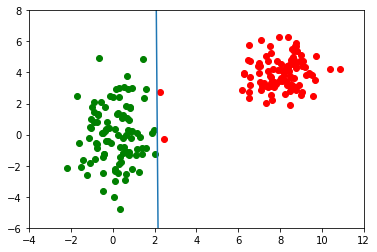

In [4]:
n_i = [100,100]
n = sum(n_i)
C = len(n_i)
x_test = []

x_test.append(np.dot(np.random.randn(n_i[0],2),np.sqrt(np.diag([1,4]))))
x_test.append(np.random.randn(n_i[1],2)+np.dot(np.asarray([[1.]*n_i[1]]).T,np.asarray([[8.0,4.0]])))

for i in range(len(n_i)):
    x_tmp = np.ones((n_i[i],1))
    x_test[i] = np.append(x_test[i],x_tmp,axis=1)
    
X = np.concatenate((x_test[0],x_test[1]),axis=0)
#print(X.shape)
y = np.zeros((len(X)),dtype='int')

upper = 0
idx = 0
for i in range(len(n_i)):
    upper += n_i[i]
    while idx < upper:
        y[idx]=i
        idx += 1

x_lim = [min(X[:,0]),max(X[:,0])]
y_lim = [min(X[:,1]),max(X[:,1])]


x_test_predict = [[],[],[]]
    
n_mis = [[],[],[]]
g = np.dot(X,w.T)
g[g>0] = 0
g[g<0] = 1
g = g.astype(int)
for j in range(len(g)):
    x_test_predict[g[j]].append(X[j])
    if g[j]!=y[j]:
        n_mis[y[j]].append(1)

errors = [sum(i) for i in n_mis]
    
for i in range(C):
    x_test_predict[i] = np.asarray(x_test_predict[i])

print("Errors: ",errors)
plot_data_line(w,x_test_predict)
plt.show()

# 多クラス分類

In [5]:
def plot_line(w,x_lim,y_lim):
    xx = np.linspace(x_lim[0],x_lim[1],100)
    yy = -w[0]/w[1]*xx-w[2]/w[1]
    plt.plot(xx,yy)
    
def plot_data_lines(w,x):
    x_lim = [int(min(min(x[0][:,0]),min(x[1][:,0]),min(x[2][:,0])))-2,int(max(max(x[0][:,0]),max(x[1][:,0]),max(x[2][:,0])))+2]
    y_lim = [int(min(min(x[0][:,1]),min(x[1][:,1]),min(x[2][:,1])))-2,int(max(max(x[0][:,1]),max(x[1][:,1]),max(x[2][:,1])))+2]
    
    nc = len(x)
    print(nc)
    for i in range(nc):
        plt.scatter(x[i][:,0],x[i][:,1])
    
    for i in range(C):
        plot_line(w[i],x_lim,y_lim)
    plt.legend(["g1","g2","g3"])
    
    plt.xlim(x_lim)
    plt.ylim(y_lim)


#### 訓練データの生成と学習

In [6]:
n_i = [300,500,400]
n = sum(n_i)
C = len(n_i)
x = []

x.append(np.dot(np.random.randn(n_i[0],2),np.sqrt(np.diag([1,4]))))
x.append(np.random.randn(n_i[1],2)+np.dot(np.asarray([[1.]*n_i[1]]).T,np.asarray([[8.0,4.0]])))
x.append(np.dot(np.random.randn(n_i[2],2),np.sqrt(np.asarray([[1.45,1],[1,2]])))+15.0)
    

for i in range(len(n_i)):
    x_tmp = np.ones((n_i[i],1))
    x[i] = np.append(x[i],x_tmp,axis=1)

Initial
3


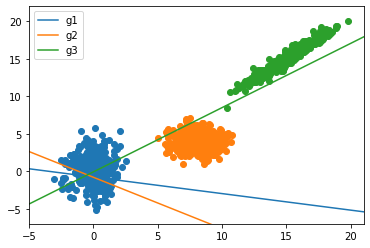

Converged at iteration # 1632
3


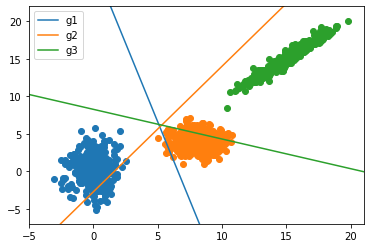

In [7]:
lr = 0.1
label = [1,-1]
w = np.random.randn(C,3)

print("Initial")
plot_data_lines(w,x)
plt.show()

iteration = 0
while True:
    n_mis = 0
    for i in range(C):
        x_i = x[i]
        g = np.dot(x_i,w.T)
        g = g.argmax(axis=1)
        for j in range(len(g)):
            if g[j]!=i:
                n_mis += 1
                w[i] = w[i] + lr*x[i][j]
                w[g[j]] = w[g[j]] - lr*x[i][j]
    iteration += 1
    #if(iteration%30==0):
        #print("iteration #%d"%(iteration))
        #plot_data_line(w,x)
        #plt.show()
    if n_mis==0:
        break

print("Converged at iteration #",iteration)
plot_data_lines(w,x)


#### テストデータの生成と評価

Errors:  [0, 1, 0]
3


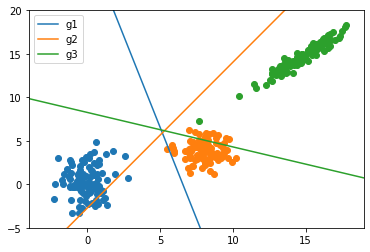

In [8]:
n_i = [100,100,100]
n = sum(n_i)
C = len(n_i)
x_test = []

x_test.append(np.dot(np.random.randn(n_i[0],2),np.sqrt(np.diag([1,4]))))
x_test.append(np.random.randn(n_i[1],2)+np.dot(np.asarray([[1.]*n_i[1]]).T,np.asarray([[8.0,4.0]])))
x_test.append(np.dot(np.random.randn(n_i[2],2),np.sqrt(np.asarray([[1.45,1],[1,2]])))+15.0)

for i in range(len(n_i)):
    x_tmp = np.ones((n_i[i],1))
    x_test[i] = np.append(x_test[i],x_tmp,axis=1)
    
X = np.concatenate((x_test[0],x_test[1],x_test[2]),axis=0)
#print(X.shape)
y = np.zeros((len(X)),dtype='int')

upper = 0
idx = 0
for i in range(len(n_i)):
    upper += n_i[i]
    while idx < upper:
        y[idx]=i
        idx += 1

x_lim = [min(X[:,0]),max(X[:,0])]
y_lim = [min(X[:,1]),max(X[:,1])]


x_test_predict = [[],[],[]]
    
n_mis = [[],[],[]]
g = np.dot(X,w.T)
g = g.argmax(axis=1)
for j in range(len(g)):
    x_test_predict[g[j]].append(X[j])
    if g[j]!=y[j]:
        n_mis[y[j]].append(1)

errors = [sum(i) for i in n_mis]
    
for i in range(C):
    x_test_predict[i] = np.asarray(x_test_predict[i])

print("Errors: ",errors)
plot_data_lines(w,x_test_predict)